In [1]:
# plot and compare locations
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from matplotlib.image import NonUniformImage
import matplotlib.colors as colors
import numpy as np
import plotly

In [4]:
# load in location file
#pd_loc=pd.read_csv('collected_locs.dat')
#pd_loc=pd.read_csv('collected_locs_OCt.csv')
pd_loc=pd.read_csv('SCM5EQ.csv')

In [12]:
pd_loc["dtime"]=pd.to_datetime(pd_loc[["year","month","day","hour","minute","second"]])

In [13]:
dtt=pd_loc.dtime.values.astype(np.int64) // 10 ** 9
pd_loc["dtt"]=dtt-min(dtt)

In [14]:
pd_loc

,year,month,day,hour,minute,second,evla,evlo,evdp,dtime,dtt
0,2020,8,9,0,1,46.65,35.47,-84.05,5.000.00,2020-08-09 00:01:46.650,0
1,2020,8,9,4,43,55.52,37.21,-80.42,5.000.00,2020-08-09 04:43:55.520,16929
2,2020,8,9,4,44,19.90,37.64,-83.59,5.000.00,2020-08-09 04:44:19.900,16953
3,2020,8,9,5,57,28.15,36.11,-81.81,5.000.00,2020-08-09 05:57:28.150,21342
4,2020,8,9,5,57,49.97,36.33,-83.48,5.000.00,2020-08-09 05:57:49.970,21363
5,2020,8,9,5,58,0.19,36.02,-82.05,5.000.00,2020-08-09 05:58:00.190,21374
6,2020,8,9,6,2,40.76,36.02,-82.71,5.000.00,2020-08-09 06:02:40.760,21654
7,2020,8,9,6,7,11.42,37.21,-80.42,5.000.00,2020-08-09 06:07:11.420,21925
8,2020,8,9,6,7,39.02,36.02,-82.71,5.000.00,2020-08-09 06:07:39.020,21953
9,2020,8,9,12,8,11.27,36.33,-83.48,5.000.00,2020-08-09 12:08:11.270,43585


In [53]:
import plotly.express as px
df=pd_loc
fig = px.scatter_mapbox(df, lat='evla', lon='evlo',color='dtime',
                        center=dict(lat=36, lon=-82), zoom=6,
                        mapbox_style="carto-darkmatter")
fig.show()

In [18]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(go.Scattermapbox(
        lat=pd_loc.evla,
        lon=pd_loc.evlo,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=10,
            color=pd_loc['dtt'],
            colorscale= 'Portland',
            #opacity=0.3,
            symbol = 'circle',
        ),
    ))


fig.update_layout(
    hovermode='closest',
    
    #mapbox_style="open-street-map",
    mapbox=dict(
        accesstoken='pk.eyJ1IjoieWNodWFuZzM1IiwiYSI6ImNqeGtzZDluZzFkcWgzem12ZDY2cWpoemsifQ.1_ZAhhpXtE2hnkSCtKIDZw',
        style='mapbox://styles/ychuang35/cjxlwvwur15fj1cousoa18kju',
        zoom=6,
        center=dict(lat=36, lon=-82)
    ),
    height=700,
    width=650
    )

#fig = px.scatter_mapbox(pd_loc, lat="evla", lon="evlo",color='evdp',mapbox_style="carto-positron",
#                        zoom=6,center=dict(lat=23.5, lon=121),width=800,height=800,
#                       color_continuous_scale=px.colors.cyclical.IceFire,mode='markers',
#                       marker=go.scattermapbox.Marker(
#            size=1
#        ),)
#fig = go.Figure(data=go.Scattergeo(
#        lon = pd_loc['evlo'],
#        lat = pd_loc['evla'],
#        mode = 'markers',
#        marker_color = pd_loc['evdp']
#        ))
#fig = px.density_mapbox(pd_loc, lat='evla', lon='evlo', z='evdp', radius=1,
#                        center=dict(lat=23.5, lon=120), zoom=6,
#                        mapbox_style="stamen-terrain")
fig.show()

In [36]:
pd_loc_cwb=pd.read_csv('taiwan_2008_2010_eq_cata.csv')
#pd_loc[pd_loc["method"]=="cpic"]

In [1]:
pd_loc_cwb=pd_loc_cwb[pd_loc_cwb.year==2009]
pd_loc_cwb=pd_loc_cwb[pd_loc_cwb.month>=7]
pd_loc_cwb=pd_loc_cwb[pd_loc_cwb.month<10]
pd_loc_cwb.head()
len(pd_loc_cwb)

NameError: name 'pd_loc_cwb' is not defined

/Users/lindsaychuang/opt/anaconda3/envs/obspy/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/lindsaychuang/opt/anaconda3/envs/obspy/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


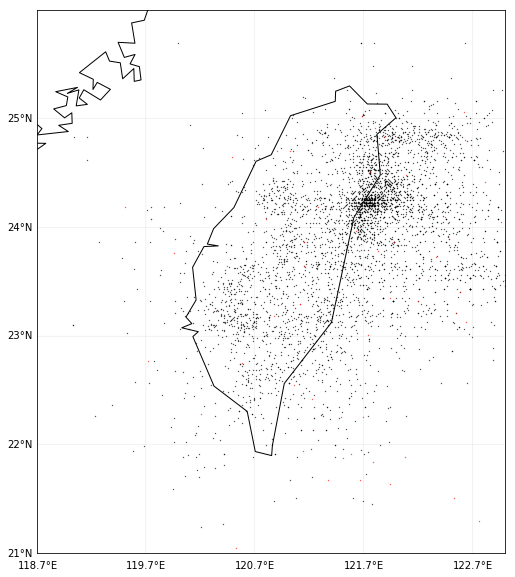

In [42]:
# plot basemap
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(projection='merc', resolution='l', epsg = 4269, 
        llcrnrlon=118.7,llcrnrlat=21,urcrnrlon=123,urcrnrlat=26)

proj = Basemap(projection='merc', resolution='l', 
        llcrnrlon=118.7,llcrnrlat=21,urcrnrlon=123,urcrnrlat=26)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10,forward=True)

cmap = plt.get_cmap('YlOrRd')
cmap.set_bad(color ='white', alpha =0.001)


m.axes=ax
#ca=ax.contourf(xcenters, ycenters, H,cmap=plt.cm.RdYlBu_r,alpha=0.6)
#c = ax.pcolormesh(Xn, Yn, data1, cmap=cmap,alpha=0.05)
#pcm = ax.pcolor(Xn, Yn, data1, norm=colors.LogNorm(vmin=200, vmax=7000),cmap=cmap,alpha=0.8)
# Background of map: shaded relief (requires internet connection)
m.arcgisimage(service='World_Shaded_Relief', xpixels = 1000, verbose= False, alpha=1)
# Lat/lon grid (lines hidden)
m.drawparallels(np.arange(21,26,1),labels=[1,0,0,0],linewidth=0.1)
m.drawmeridians(np.arange(118.7,123,1),labels=[0,0,0,1],linewidth=0.1)
m.drawcoastlines()
# locs
p1 = m.plot(pd_loc[pd_loc["type"]=="LOCATED"].evlo.values,pd_loc[pd_loc["type"]=="LOCATED"].evla.values,
            color='black',marker='o',ms=0.3,linestyle = 'None',latlon=True)
p2= m.plot(pd_loc[pd_loc["type"]=="REJECTED"].evlo.values,pd_loc[pd_loc["type"]=="REJECTED"].evla.values,
            color='red',marker='o',ms=0.3,linestyle = 'None',latlon=True)
#p3= m.plot(pd_loc_cwb.evlo.values,pd_loc_cwb.evla.values,
#            color='blue',marker='o',ms=0.3,linestyle = 'None',latlon=True)

#
#plt.legend((p1[0], p2[0], p3[0]), ('Located events', 'Rejected events', 'CWB picks'))
#plt.colorbar(pcm,fraction=0.08, pad=0.04)
plt.savefig('heatmap.png', format='png',dpi=300)
plt.show()
plt.close()

/Users/lindsaychuang/miniconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/Users/lindsaychuang/miniconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


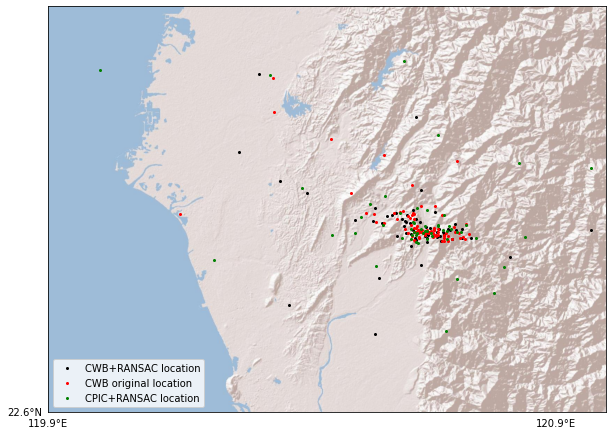

In [14]:
# plot basemap
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(projection='merc', resolution='l', epsg = 4269, 
        llcrnrlon=119.9,llcrnrlat=22.6,urcrnrlon=121,urcrnrlat=23.4)

proj = Basemap(projection='merc', resolution='l', 
        llcrnrlon=119.9,llcrnrlat=22.6,urcrnrlon=121,urcrnrlat=23.4)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10,forward=True)

cmap = plt.get_cmap('YlOrRd')
cmap.set_bad(color ='white', alpha =0.001)


m.axes=ax
#ca=ax.contourf(xcenters, ycenters, H,cmap=plt.cm.RdYlBu_r,alpha=0.6)
#c = ax.pcolormesh(Xn, Yn, data1, cmap=cmap,alpha=0.05)
#pcm = ax.pcolor(Xn, Yn, data1, norm=colors.LogNorm(vmin=200, vmax=7000),cmap=cmap,alpha=0.8)
# Background of map: shaded relief (requires internet connection)
m.arcgisimage(service='World_Shaded_Relief', xpixels = 1000, verbose= False, alpha=1)
# Lat/lon grid (lines hidden)
m.drawparallels(np.arange(22.6,23.4,1),labels=[1,0,0,0],linewidth=0.)
m.drawmeridians(np.arange(119.9,121,1),labels=[0,0,0,1],linewidth=0.)

# locs
p1 = m.plot(pd_loc[pd_loc["method"]=="cwb"].evlo.values,pd_loc[pd_loc["method"]=="cwb"].evla.values,
            color='black',marker='o',ms=2,linestyle = 'None',latlon=True)
p2= m.plot(pd_loc[pd_loc["method"]=="cwbansp"].evlo.values,pd_loc[pd_loc["method"]=="cwbansp"].evla.values,
            color='red',marker='o',ms=2,linestyle = 'None',latlon=True)
p3= m.plot(pd_loc[pd_loc["method"]=="cpic"].evlo.values,pd_loc[pd_loc["method"]=="cpic"].evla.values,
            color='green',marker='o',ms=2,linestyle = 'None',latlon=True)
#
plt.legend((p1[0], p2[0], p3[0]), ('CWB+RANSAC location', 'CWB original location', 'CPIC+RANSAC location'))
#plt.colorbar(pcm,fraction=0.08, pad=0.04)
plt.savefig('heatmap.png', format='png',dpi=300)
plt.show()
plt.close()

In [5]:
cwbransac=pd_loc[pd_loc["method"]=="cwb"].evdp.values
cwb=pd_loc[pd_loc["method"]=="cwbansp"].evdp.values
cpicransac=pd_loc[pd_loc["method"]=="cpic"].evdp.values

Text(0.5, 1.0, 'Event depth of CWB+RANSAC')

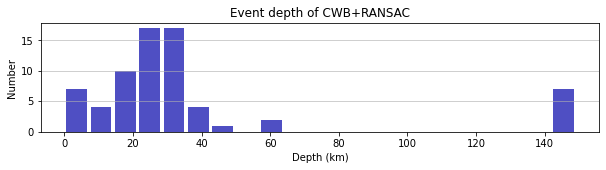

In [20]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,2,forward=True)
n, bins, patches = plt.hist(x=cwbransac, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Depth (km)')
plt.ylabel('Number')
plt.title('Event depth of CWB+RANSAC')

Text(0.5, 1.0, 'Event depth of CWB original')

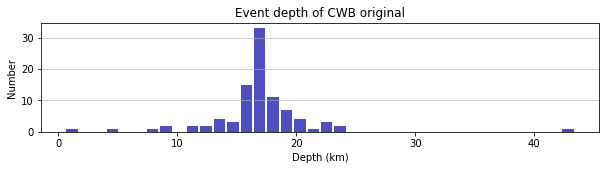

In [21]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,2,forward=True)
n, bins, patches = plt.hist(x=cwb, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Depth (km)')
plt.ylabel('Number')
plt.title('Event depth of CWB original')

Text(0.5, 1.0, 'Event depth of CPIC+RANSAC')

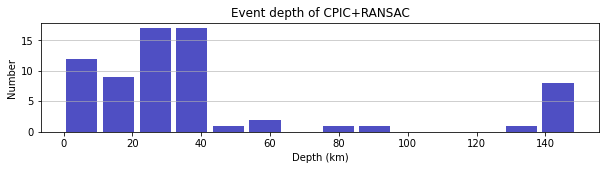

In [22]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,2,forward=True)
n, bins, patches = plt.hist(x=cpicransac, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Depth (km)')
plt.ylabel('Number')
plt.title('Event depth of CPIC+RANSAC')